In [71]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
import os 
for dirname, _, filenames in os.walk('D:\kaqqle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:\kaqqle\StudentsPerformance.csv
D:\kaqqle\happiness\2015.csv
D:\kaqqle\happiness\2016.csv
D:\kaqqle\happiness\2017.csv
D:\kaqqle\happiness\2018.csv
D:\kaqqle\happiness\2019.csv


In [35]:
import warnings
warnings.filterwarnings("ignore")

In [36]:
df = pd.read_csv('D:\kaqqle\StudentsPerformance.csv')

In [37]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [38]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [39]:
df.shape

(1000, 8)

In [40]:
df.columns
    

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [41]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [42]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [43]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [58]:
data=df.drop(['race/ethnicity','parental level of education'],axis=1)

In [59]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [60]:
data.head()

,gender,lunch,test preparation course,math score,reading score,writing score
0,female,standard,none,72,72,74
1,female,standard,completed,69,90,88
2,female,standard,none,90,95,93
3,male,free/reduced,none,47,57,44
4,male,standard,none,76,78,75


In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
le = LabelEncoder()

In [65]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [66]:
data.loc[:, "gender"] = le.fit_transform(data['gender'].values)
data['gender'].value_counts()

0    518
1    482
Name: gender, dtype: int64

In [67]:
data['test preparation course'].value_counts()

1    642
0    358
Name: test preparation course, dtype: int64

In [61]:
data.loc[:, "test preparation course"] = le.fit_transform(data['test preparation course'].values)
data['test preparation course'].value_counts()

1    642
0    358
Name: test preparation course, dtype: int64

In [63]:
data.loc[:, "lunch"] = le.fit_transform(data['lunch'].values)
data['lunch'].value_counts()

1    645
0    355
Name: lunch, dtype: int64

In [68]:
data.head()

,gender,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,72,72,74
1,0,1,0,69,90,88
2,0,1,1,90,95,93
3,1,0,1,47,57,44
4,1,1,1,76,78,75


In [69]:
corelation = data.corr()

<AxesSubplot:>

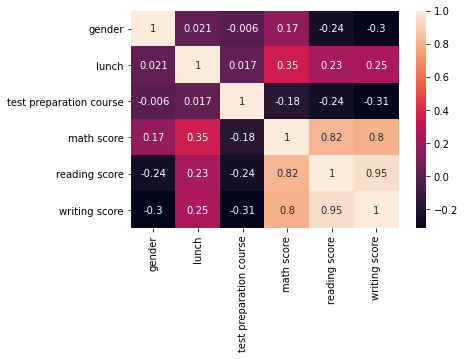

In [76]:
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

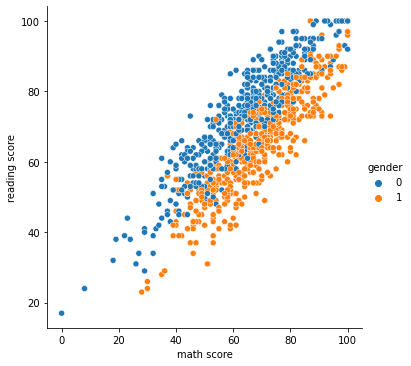

In [74]:
sns.relplot(x='math score',y='reading score',hue='gender', data=data)

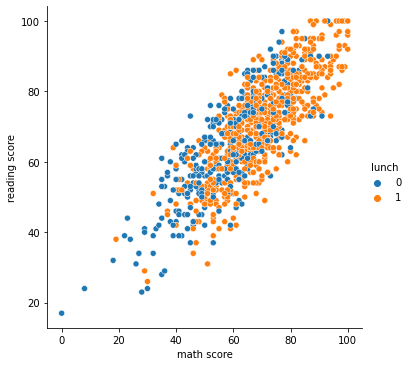

In [80]:
sns.relplot(x='math score',y='reading score',hue='lunch', data=data)

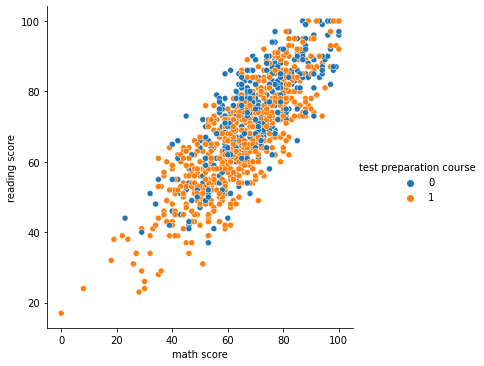

In [81]:
sns.relplot(x='math score',y='reading score',hue='test preparation course', data=data)

<AxesSubplot:xlabel='math score', ylabel='Density'>

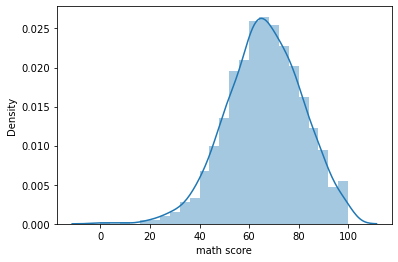

In [77]:
sns.distplot(data['math score'])

<AxesSubplot:xlabel='reading score', ylabel='Density'>

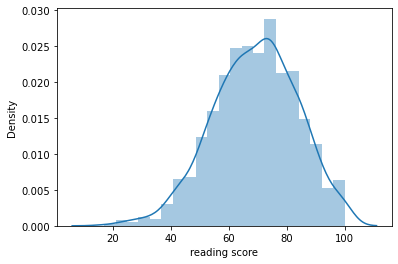

In [82]:
sns.distplot(data['reading score'])

<AxesSubplot:xlabel='writing score', ylabel='Density'>

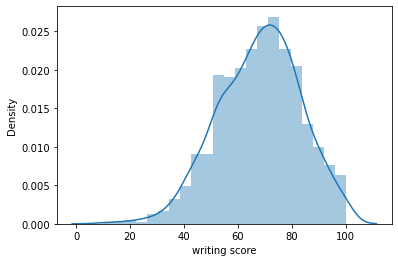

In [83]:
sns.distplot(data['writing score'])

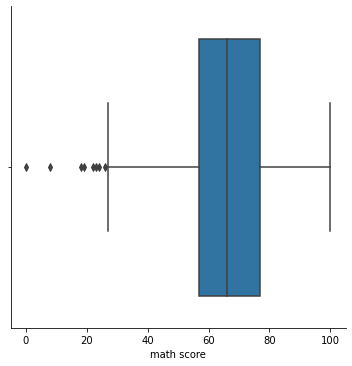

In [79]:
sns.catplot(x='math score',kind='box',data=data)

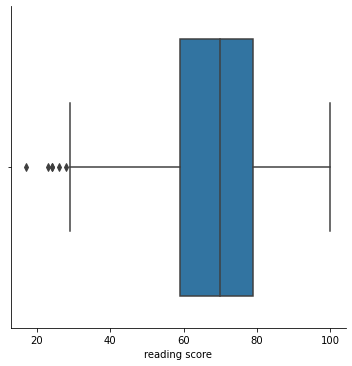

In [84]:
sns.catplot(x='reading score',kind='box',data=data)

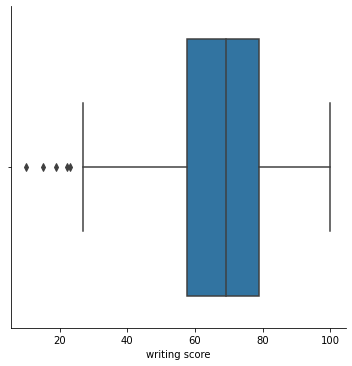

In [85]:
sns.catplot(x='writing score',kind='box',data=data)